In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from datetime import datetime, timedelta
import warnings
import datetime
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [2]:
df=pd.read_csv("X_bid_price_7_2018_26_4_2019_three_class.csv")

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.shape

(1510, 850)

In [5]:
#df_first_quarter=df[(df['month_1']==1)]

In [6]:
#df_first_quarter.shape

In [7]:
y=df['class_target1']
X1=df.drop(['class_target1'],axis=1)
clf = load('gb_3_class_bid_price_target1.joblib')
features_three_class_bid_price=pd.read_csv("features_three_class_bid_price_target1.csv")
features_three_class_bid_price=features_three_class_bid_price['col_name']
X1=X1[features_three_class_bid_price]
y_pred=clf.predict(X1)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))
accuracy_score(y,y_pred)

              precision    recall  f1-score   support

          -1       0.54      0.53      0.53       738
           0       0.00      0.00      0.00        39
           1       0.54      0.57      0.56       733

   micro avg       0.54      0.54      0.54      1510
   macro avg       0.36      0.37      0.36      1510
weighted avg       0.53      0.54      0.53      1510



0.5370860927152318

In [8]:
probabilities_3_class_bid_price = pd.DataFrame(clf.predict_proba(X1))
probabilities_3_class_bid_price.columns=['-1_class','0_class','1_class']
probabilities_3_class_bid_price.to_csv("probabilities_3_class_bid_price_target1.csv")

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
print(confusion_matrix(y,y_pred))

[[393   4 341]
 [ 26   0  13]
 [313   2 418]]


Using TensorFlow backend.


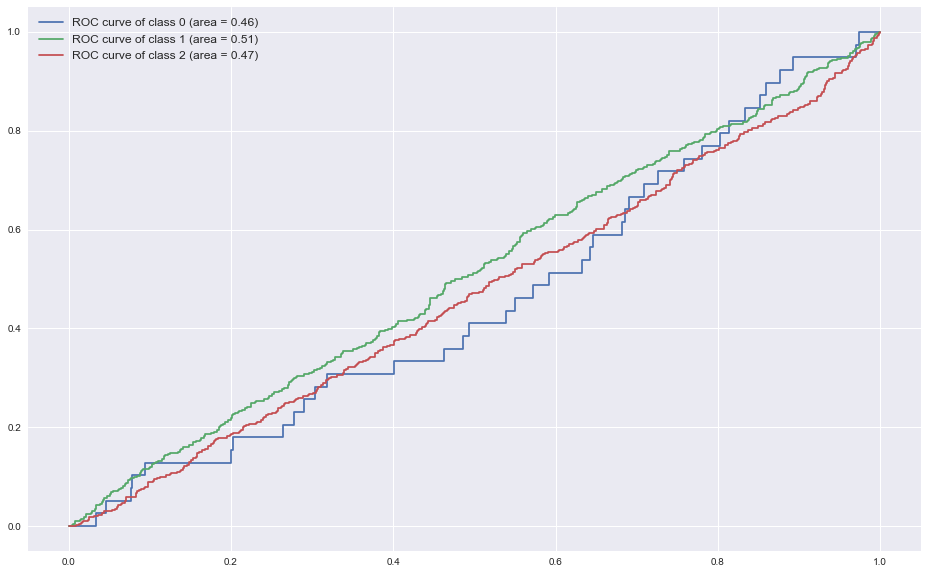

In [11]:
import keras
y_pred_proba=clf.predict_proba(X1)
y_test_cat = keras.utils.to_categorical(y, 3) 
from sklearn.metrics import roc_curve, auc,roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i],  y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 
fig=plt.figure(figsize=(16, 10))

for i in range(3):

    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.legend(fontsize=12)
plt.show() 
 


In [12]:
#df.head()
y_pred_3_class_close_7=pd.DataFrame(y_pred)
y_pred_3_class_close_7.columns=['y_pred_3_class_bid_price']
df_final_1=pd.concat([df,y_pred_3_class_close_7],axis=1)

In [13]:
df_final_1.to_csv("Model_prediction_file_3_class_bid_price_target1.csv")